In [2]:
# Importamos TensorFlow, una librería para construir y entrenar modelos de aprendizaje automático.
import tensorflow as tf  # TensorFlow es como una caja de herramientas para hacer modelos inteligentes.

# Importamos NumPy, una librería para trabajar con números y listas de números.
import numpy as np  # NumPy nos ayuda a hacer cálculos matemáticos rápidos y eficientes.

# Importamos Matplotlib, una librería para crear gráficos y visualizaciones.
import matplotlib.pyplot as plt  # Matplotlib nos permite dibujar gráficos para entender mejor los datos.

In [3]:
# 1.1. Import the Fashion MNIST dataset

# Importamos TensorFlow, que es la librería principal para trabajar con modelos de aprendizaje automático.
import tensorflow as tf  # Le damos el nombre corto "tf" para usarlo más fácilmente.

# Cargamos el conjunto de datos Fashion MNIST usando TensorFlow y Keras.
fashion_mnist = tf.keras.datasets.fashion_mnist  # Fashion MNIST es un conjunto de datos de imágenes de ropa.

# Descargamos y dividimos el conjunto de datos en datos de entrenamiento y prueba.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # Carga los datos.

In [4]:
# Cada imagen en el conjunto de datos Fashion MNIST está asociada a una etiqueta numérica.
# Las etiquetas son números del 0 al 9, que representan diferentes categorías de ropa.

# Como no hay nombres de clases en el conjunto de datos, definimos los nombres manualmente.

# Definimos los nombres de las clases correspondientes a las etiquetas numéricas.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Ahora podemos usar estos nombres para mostrar las imágenes con sus etiquetas correctas.

In [5]:
# 1.2. Data exploration

# Verificamos la forma (shape) del conjunto de imágenes de entrenamiento.
train_images.shape  # Esto nos dice cuántas imágenes hay y sus dimensiones.

(60000, 28, 28)

In [6]:
# Verificamos la cantidad de etiquetas en el conjunto de entrenamiento.
len(train_labels) # Esto nos dice cuántas etiquetas hay en total.

60000

In [7]:
# Mostramos las etiquetas del conjunto de entrenamiento.
train_labels # Esto nos muestra todas las etiquetas asociadas a las imágenes de entrenamiento.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# Verificamos la forma (shape) del conjunto de imágenes de prueba.
test_images.shape # Esto nos dice cuántas imágenes hay y sus dimensiones.

(10000, 28, 28)

In [9]:
len(test_labels)

10000

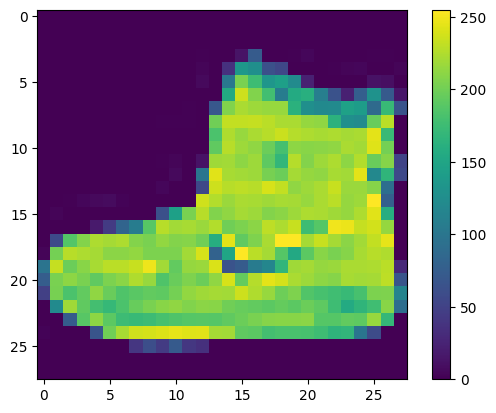

In [10]:
# The first image of train set shows that the scope of pixels is in 0~255.

plt.figure() # Crea una nueva figura en Matplotlib para mostrar la imagen.

plt.imshow(train_images[0]) # Muestra la primera imagen del conjunto de entrenamiento.

plt.colorbar() # Añade una barra de colores al lado de la imagen para visualizar los valores de los píxeles.

plt.grid(False) # Desactiva la cuadrícula en la imagen para una visualización más limpia.

plt.show() # Renderiza y muestra la imagen en pantalla.

In [11]:
# Before passing into neural network model, set this range to 0~1.

train_images = train_images / 255.0 # Normaliza los valores de los píxeles del conjunto de entrenamiento al rango [0, 1].
test_images = test_images / 255.0 # Normaliza los valores de los píxeles del conjunto de prueba al rango [0, 1].

plt.figure(figsize=(10,10)) # Crea una nueva figura con un tamaño de 10x10 pulgadas.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

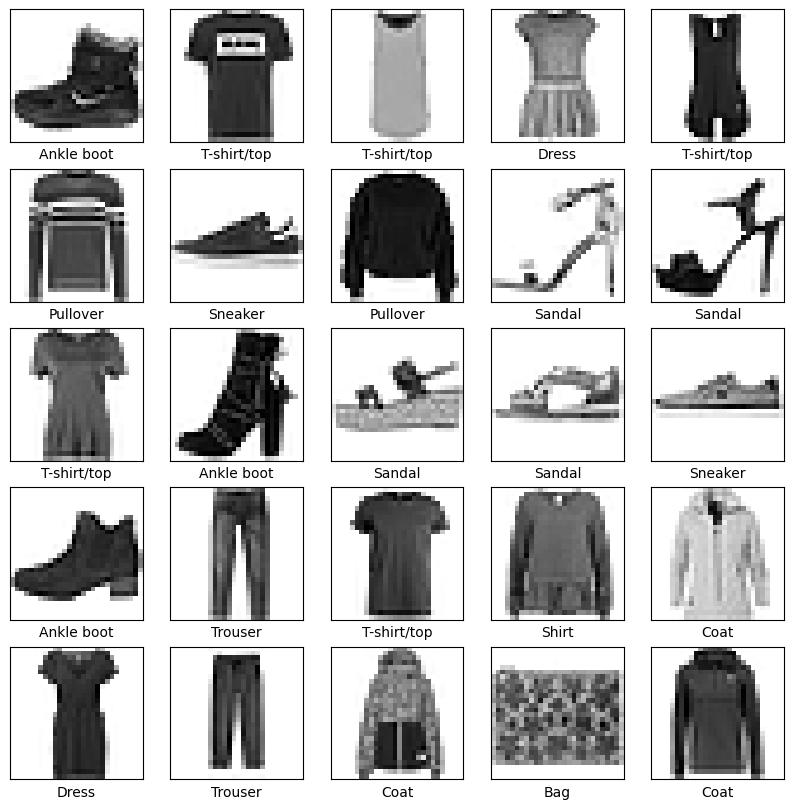

In [12]:
plt.figure(figsize=(10,10)) # Crea una nueva figura con un tamaño de 10x10 pulgadas.

for i in range(25): # Itera sobre los primeros 25 ejemplos del conjunto de entrenamiento.
                    plt.subplot(5,5,i+1) # Crea una subgráfica de una cuadrícula de 5x5 en la posición i+1.

                    plt.xticks([]) # Oculta los valores del eje X.
                    plt.yticks([]) # Oculta los valores del eje Y.

                    plt.grid(False) # Desactiva la cuadrícula en la imagen.
                    plt.imshow(train_images[i], cmap=plt.cm.binary) # Muestra la imagen en escala de grises binaria.

                    plt.xlabel(class_names[train_labels[i]]) # Establece la etiqueta de la imagen según su clase.

plt.show() # Muestra la figura con las 25 imágenes.

In [13]:
# 1.4. Create the model

# Definir la arquitectura del modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplana la imagen de 28x28 píxeles a un vector de 784 elementos.
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU.
    tf.keras.layers.Dense(10)  # Capa de salida con 10 neuronas (una por cada clase), sin activación (se aplicará softmax después).
])

c:\Users\chapu\Documents\Repositorios2\Samsung_InovationCampus\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# 1.5. Compile the model

model.compile(optimizer='adam',  # Configura el optimizador Adam para ajustar los pesos del modelo.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Usa entropía cruzada como función de pérdida para clasificación multiclase.
              metrics=['accuracy'])  # Evalúa la precisión del modelo durante el entrenamiento y prueba.

In [15]:
# 1.6. Train the model

model.fit(train_images, train_labels, epochs=10) # Entrena el modelo con los datos de entrenamiento durante 10 épocas.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7783 - loss: 0.6330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8609 - loss: 0.3835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8789 - loss: 0.3323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3133
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.2865
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8970 - loss: 0.2757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9029 - loss: 0.2624
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9072 - loss: 0.2495
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9072 - loss: 0.2445
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9140 - loss: 0.2342


In [16]:
#### 1.7. Evaluar la precisión del modelo

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # Evalúa el modelo en los datos de prueba y obtiene la pérdida y precisión.

print('\nTest accuracy:', test_acc) # Imprime la precisión obtenida en el conjunto de prueba.

313/313 - 0s - 1ms/step - accuracy: 0.8834 - loss: 0.3351

Test accuracy: 0.883400022983551


In [17]:
# 1.8. Prediction

probability_model = tf.keras.Sequential([model, #Crea un nuevo modelo que incluye el modelo previamente definido.
                                    tf.keras.layers.Softmax()]) # Añade una capa Softmax al final para convertir los logits en probabilidades.

predictions = probability_model.predict(test_images) #Realiza predicciones sobre el conjunto de prueba utilizando el modelo con Softmax.

predictions[0] # Muestra las probabilidades de la primera imagen en el conjunto de prueba.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


array([5.37187894e-08, 5.07911757e-09, 5.68087591e-11, 1.44981682e-09,
       1.40954870e-09, 7.90220045e-04, 1.16448575e-08, 1.89390650e-03,
       6.86651674e-07, 9.97315109e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

np.int64(9)

In [19]:
# Crear un modelo con más capas y regularización para mejorar la capacidad de generalización.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplana las imágenes de entrada (28x28) a un vector de 784 valores.
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLU.
    tf.keras.layers.Dropout(0.2),  # Añade Dropout para evitar el sobreajuste, con tasa del 20%.
    tf.keras.layers.Dense(64, activation='relu'),  # Añade otra capa oculta con 64 neuronas y ReLU.
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase), usa Softmax para probabilidades.
])

# Compilamos el modelo con el optimizador Adam y la función de pérdida de entropía cruzada.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Usamos 'from_logits=False' porque ahora usamos Softmax.
              metrics=['accuracy'])

# Entrenamos el modelo con 10 épocas, lo cual es una cantidad estándar para comenzar.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7578 - loss: 0.6869 - val_accuracy: 0.8485 - val_loss: 0.4146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8502 - loss: 0.4077 - val_accuracy: 0.8552 - val_loss: 0.3967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8654 - loss: 0.3681 - val_accuracy: 0.8533 - val_loss: 0.4053
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8712 - loss: 0.3484 - val_accuracy: 0.8635 - val_loss: 0.3730
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8772 - loss: 0.3317 - val_accuracy: 0.8714 - val_loss: 0.3568
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8842 - loss: 0.3173 - val_accuracy: 0.8753 - val_loss: 0.3449
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8827 - loss: 0.3166 - val_accuracy: 0.8778 - val_loss: 0.3365
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3016 - 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nTest acc : {test_acc}")

313/313 - 0s - 876us/step - accuracy: 0.8844 - loss: 0.3227

Test acc : 0.8844000101089478


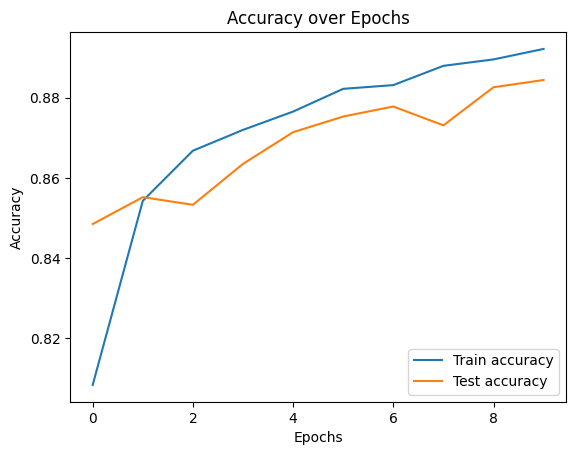

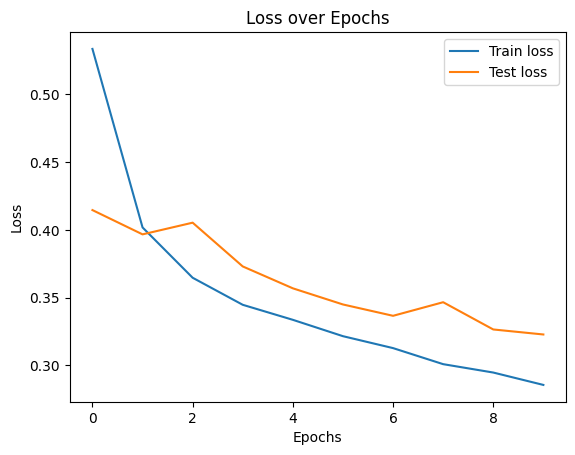

In [21]:
import matplotlib.pyplot as plt

# Graficamos la precisión durante el entrenamiento y la validación.
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epochs')  # épocas
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')
plt.show()

# Graficamos la pérdida durante el entrenamiento y la validación.
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


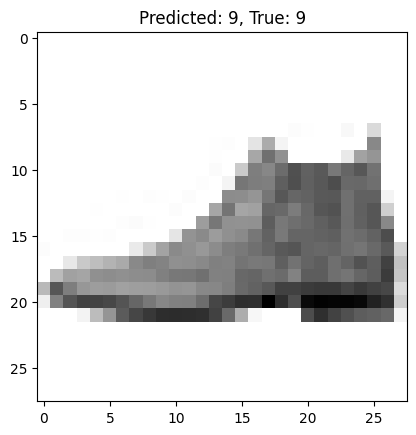

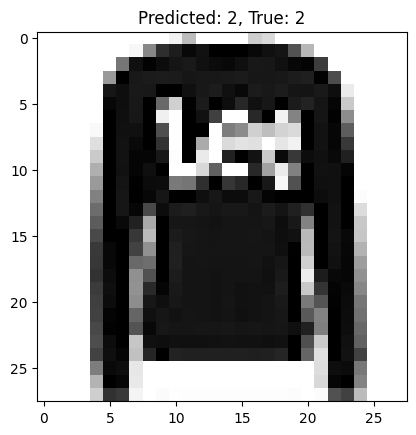

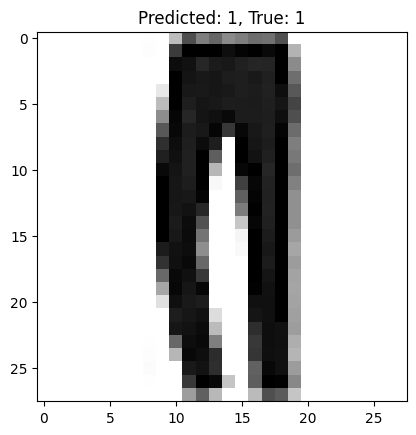

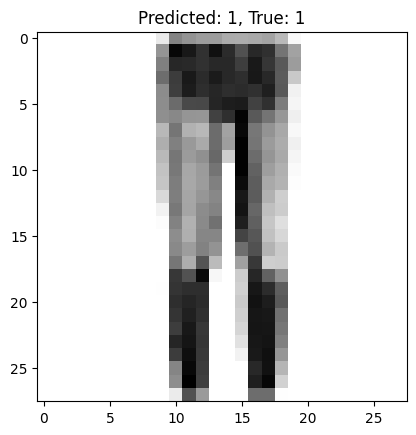

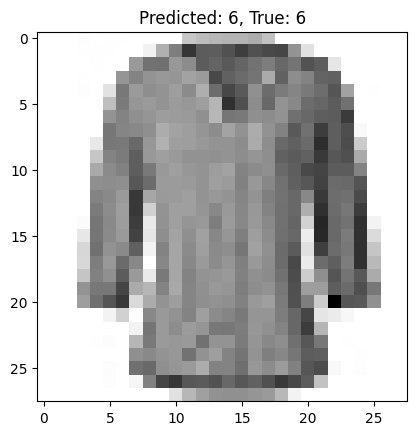

In [22]:
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
    plt.show()

In [24]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} GPU física detectada, {len(logical_gpus)} GPU lógica disponible")
    except RuntimeError as e:
        print(e)

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Mejorar el modelo con más capas y Dropout para evitar sobreajuste
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplana las imágenes de 28x28 a un vector de 784
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y ReLU
    tf.keras.layers.Dropout(0.2),  # Dropout con una tasa del 20% para prevenir sobreajuste
    tf.keras.layers.Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase)
])

# Compilación del modelo
model.compile(optimizer='adam',  # Usamos Adam como optimizador
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # 'from_logits=False' porque usamos Softmax
              metrics=['accuracy'])

# Entrenar el modelo durante más épocas
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')

plt.show()

# Realizar predicciones y mostrar ejemplos de imágenes con las etiquetas predichas
predictions = model.predict(test_images)

# Mostrar algunas predicciones junto con las imágenes
for i in range(5):  # Mostrar las primeras 5 imágenes
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")  # Mostrar predicción vs. etiqueta real
    plt.show()

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7493 - loss: 0.7034 - val_accuracy: 0.8350 - val_loss: 0.4438
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8493 - loss: 0.4105 - val_accuracy: 0.8624 - val_loss: 0.3832
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3691 - val_accuracy: 0.8682 - val_loss: 0.3740
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8713 - loss: 0.3493 - val_accuracy: 0.8605 - val_loss: 0.3788
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3330 - val_accuracy: 0.8660 - val_loss: 0.3672
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8799 - loss: 0.3243 - val_accuracy: 0.8634 - val_loss: 0.3752
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8824 - loss: 0.3160 - val_accuracy: 0.8738 - val_loss: 0.3512
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8881 - loss: 0.2999 - 

KeyboardInterrupt: 